# Single-cell analysis of Grpr expressing dorsal horn neurons

Single-cell analysis of Grpr positive neurons from Häring et al (2018) Supplementary Table 1 dataset. The dataset contains data from 24,384 genes in 1,545 individual dorsal horn neurons and was accessed through Gene Expression Omnibus (GEO: GSE103840).

In this analysis, we investigated the distribution of Grpr expression in GABAergic and glutamatergic dorsal horn neurons (supplementary) and the prevalence and co-expression levels of genes important for rythmic membrane activity, as well as receptor subunits for GABAergic, glutamatergic and glycinergic input. 

In [23]:
# import necessary modules
import pandas as pd
import scanpy.api as sc
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns

# make the text in figures editable in Illustrator
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [25]:
# open the Häring et al dataset
df = pd.read_csv('GSE103840_molecule_counts.csv', index_col=0, sep = ';').T
df.head()

cellid,Xkr4,Rp1,Sox17,Mrpl15,Lypla1,Tcea1,Rgs20,Atp6v1h,Oprk1,Npbwr1,...,Gm20736_loc9,Ssty2_loc4,Gm20806_loc3,Ssty2_loc1,Gm20806_loc4,Gm20747_loc4,Gm20736_loc10,Gm20854_loc1,Gm20854_loc2,Erdr1
1772099315_F07,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1772123028_E07,0,0,0,1,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1772099315_A01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1772099093_B11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1772117057_C10,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# open the Häring et al metadata
metadata = pd.read_csv('GSE103840_metadata.csv', index_col = 0, sep = ';').T
metadata

cellid,age(days),sex(female=1),total mol,cluster name,standard_names,strain
1772099315_F07,22,1,10814,Glut_Cck_Maf,Glut1,C57bl6
1772123028_E07,25,0,6950,Glut_Cck_Maf,Glut1,vGlut2-eGFP
1772099315_A01,22,1,7595,Glut_Cck_Maf,Glut1,C57bl6
1772099093_B11,20,0,17736,Glut_Cck_Maf,Glut1,C57bl6
1772117057_C10,27,0,5181,Glut_Cck_Maf,Glut1,C57bl6
1772122168_B04,26,0,4614,Glut_Cck_Maf,Glut1,vGlut2-eGFP
1772099302_B07,27,0,8244,Glut_Cck_Maf,Glut1,C57bl6
1772099302_D11,27,0,16600,Glut_Cck_Maf,Glut1,C57bl6
1772099114_H10,20,0,6594,Glut_Cck_Maf,Glut1,C57bl6
1772122148_H04,23,0,11598,Glut_Cck_Maf,Glut1,vGlut2-eGFP


In [27]:
## convert the dataframe into an AnnData object
adata = sc.AnnData(df.values)
adata.obs_names = df.index
adata.var_names = df.columns
adata

AnnData object with n_obs × n_vars = 1545 × 24378 

In [28]:
## Add observations of cluster belonging for each cell and if they are expressing Grpr for 
#downstream isolation
adata.obs['n_counts'] = np.sum(adata.X, axis=1)
adata.obs['cell_type'] = metadata['standard_names']
adata.obs['grpr_cell'] = (adata[:, 'Grpr'].X >= 0.01).astype(str)

In [29]:
#make the observation names unique
adata.obs_names_make_unique()
adata.var_names_make_unique()

In [30]:
## the counts per cell is normalized to the median value to compensate for cell size.
sc.pp.normalize_per_cell(adata, counts_per_cell_after = adata.obs['n_counts'].median())

In [31]:
#logaritmize all the values
adata.raw = sc.pp.log1p(adata, copy=True)
sc.pp.log1p(adata)

The mean normalized expression of marker genes in the molecular subpopulations from all neurons in dataset are visualized using a matrixplot

In [32]:
## make brackets name and position for downstream figures
vgl = ['Inhibitory', 'Excitatory', 'Hcn','AMPA', 'GABA receptor type A', 'Glycine receptor alpha', 'Glycine receptor beta']
vgp = [(1,2), (3,5), (6,9), (10,13), (14,19), (20,23), (24,24)]

... storing 'cell_type' as categorical
... storing 'grpr_cell' as categorical
saving figure to file ./figures/matrixplotgrpr_matrix_all_NEW.pdf


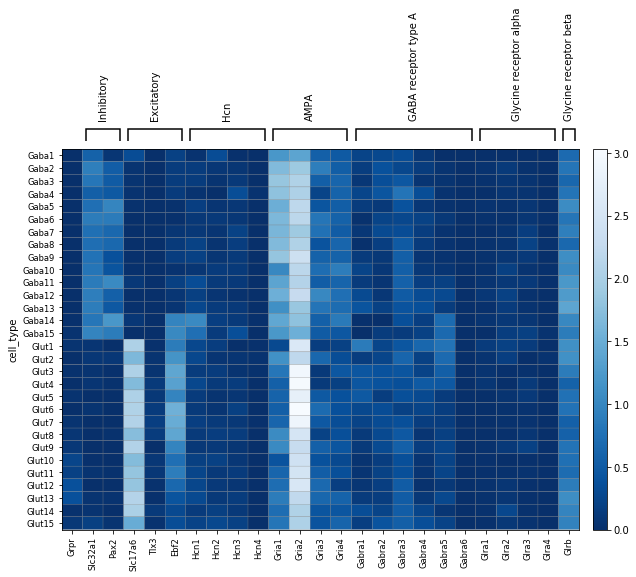

In [33]:
# list for marker genes 
marker_list = ['Grpr','Slc32a1', 'Pax2', 'Slc17a6', 'Tlx3', 'Ebf2','Hcn1', 'Hcn2', 'Hcn3', 
              'Hcn4', 'Gria1', 'Gria2','Gria3', 'Gria4','Gabra1', 'Gabra2', 'Gabra3','Gabra4', 
             'Gabra5', 'Gabra6','Glra1', 'Glra2', 'Glra3', 'Glra4', 'Glrb']

# matrixplot showing expression of marker genes in the complete dataset
sc.pl.matrixplot(adata, marker_list, groupby = 'cell_type', var_group_labels=vgl, var_group_positions= vgp, 
                 var_group_rotation= 90, cmap = 'Blues_r', save="grpr_matrix_all_NEW.pdf")

saving figure to file ./figures/stacked_violingrpr_expression_02.pdf


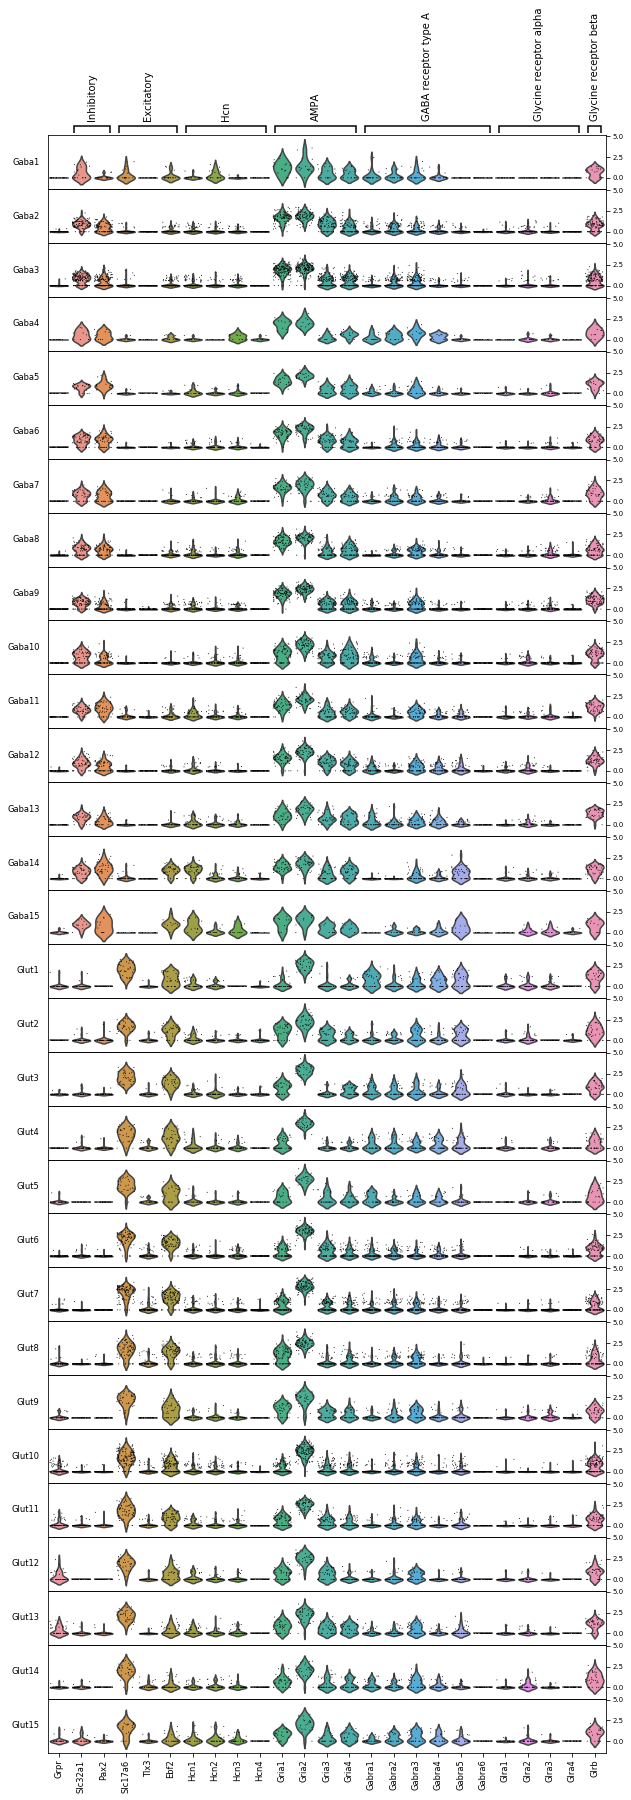

In [34]:
sc.pl.stacked_violin(adata, marker_list, use_raw=False, stripplot= True, jitter = 0.4, groupby= 'cell_type',
                     var_group_labels=vgl, var_group_positions= vgp, var_group_rotation= 90, figsize= (10, 30),
                     save = "grpr_expression_02.pdf")

All neurons expressing Grpr are isolated for further analysis. All neurons having logaritmic Grpr expression equal or higher than 0.01 are included

In [35]:
adata_grpr = adata[adata.obs['grpr_cell'] == 'True']
adata_grpr

View of AnnData object with n_obs × n_vars = 103 × 24378 
    obs: 'n_counts', 'cell_type', 'grpr_cell'

Stacked violin plot showing the expression of the marker genes in the Grpr expressing neurons

saving figure to file ./figures/stacked_violingrpr_grpr_NEW_02.pdf


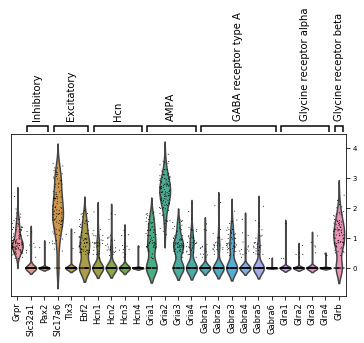

In [36]:
sc.pl.stacked_violin(adata_grpr, marker_list, use_raw=False, stripplot= True, jitter = 0.4,
                     var_group_labels=vgl, var_group_positions= vgp, var_group_rotation= 90,
                     save = "grpr_grpr_NEW_02.pdf")

Another stacked violin plot showing the expression in the Grpr expressing cells depending on their Häring et al 
molecular subgroup

saving figure to file ./figures/stacked_violingrpr_groups_NEW_02.pdf


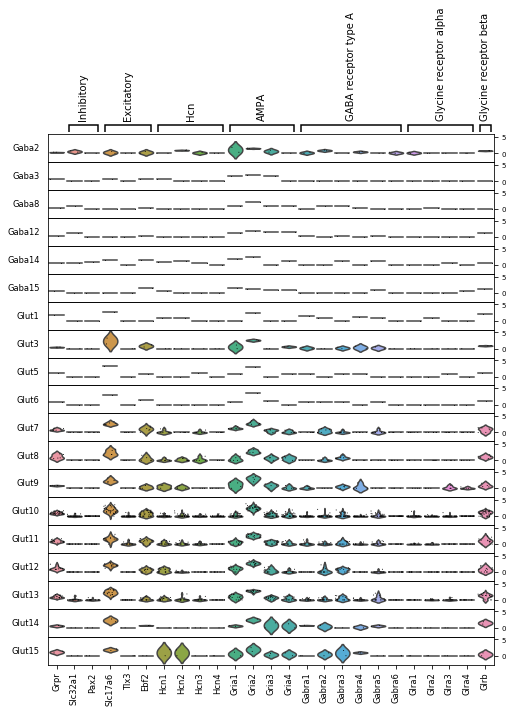

In [37]:
sc.pl.stacked_violin(adata_grpr, marker_list, jitter= 0.4, stripplot=True, 
                     groupby = 'cell_type', use_raw=False, var_group_labels=vgl, var_group_positions= vgp, var_group_rotation= 90,
                     figsize= (8, 10),save = "grpr_groups_NEW_02.pdf")

# Prevalence for gene of interest

The prevalence of the genes of interest (rythmic membrane activity, and GABAergic, glutamatergic and glycinergic signaling input). The genes are considered being prevalent if the normalized number of counts is more or equal to 0.01.

In [38]:
"""function for calculating the percentage of cells expressing gene of interest and ranking them based on prevalance"""
def percentage_exp(adata, genes):
    per_list = []
    for gene in genes:
        percentage = len(adata[adata[:, gene].X > 0.01])/len(adata.X) #expression percentage is calculated for gene
        per_list.append((gene, percentage*100)) # gene name and percentage is added to list
    return sorted(per_list, key=lambda tup: tup[1], reverse = True)

In [39]:
print(pd.DataFrame(percentage_exp(adata_grpr, marker_list)))

          0           1
0      Grpr  100.000000
1     Gria2  100.000000
2   Slc17a6   94.174757
3      Glrb   78.640777
4      Ebf2   64.077670
5     Gria1   62.135922
6     Gria3   61.165049
7    Gabra3   44.660194
8     Gria4   38.834951
9      Hcn1   30.097087
10   Gabra5   27.184466
11   Gabra2   23.300971
12     Hcn2   22.330097
13   Gabra1   14.563107
14   Gabra4   13.592233
15     Hcn3   11.650485
16  Slc32a1    8.737864
17    Glra2    4.854369
18    Glra3    4.854369
19     Tlx3    2.912621
20    Glra1    2.912621
21     Pax2    1.941748
22    Glra4    1.941748
23     Hcn4    0.970874
24   Gabra6    0.970874
